In [21]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import itertools


In [22]:
# ---- Load dataset (binary classification)
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
class_names = data.target_names  # ['malignant', 'benign']

# ---- Train/test split (stratify to keep class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [23]:
tree = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,           # limit depth to avoid overfitting (try None to grow fully)
    random_state=42
)
tree.fit(X_train, y_train)

# ---- Predict
y_pred = tree.predict(X_test)

# ---- Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.9211

Classification Report:
              precision    recall  f1-score   support

   malignant       0.87      0.93      0.90        42
      benign       0.96      0.92      0.94        72

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



In [24]:
# ---- Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

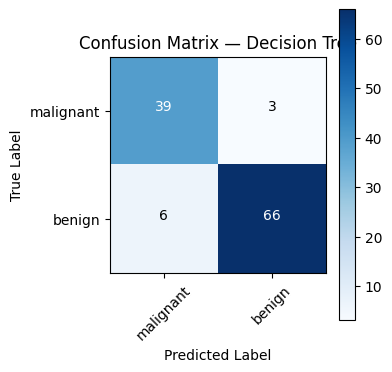

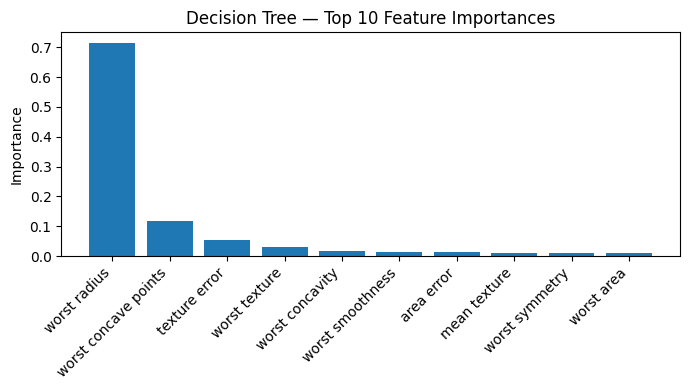

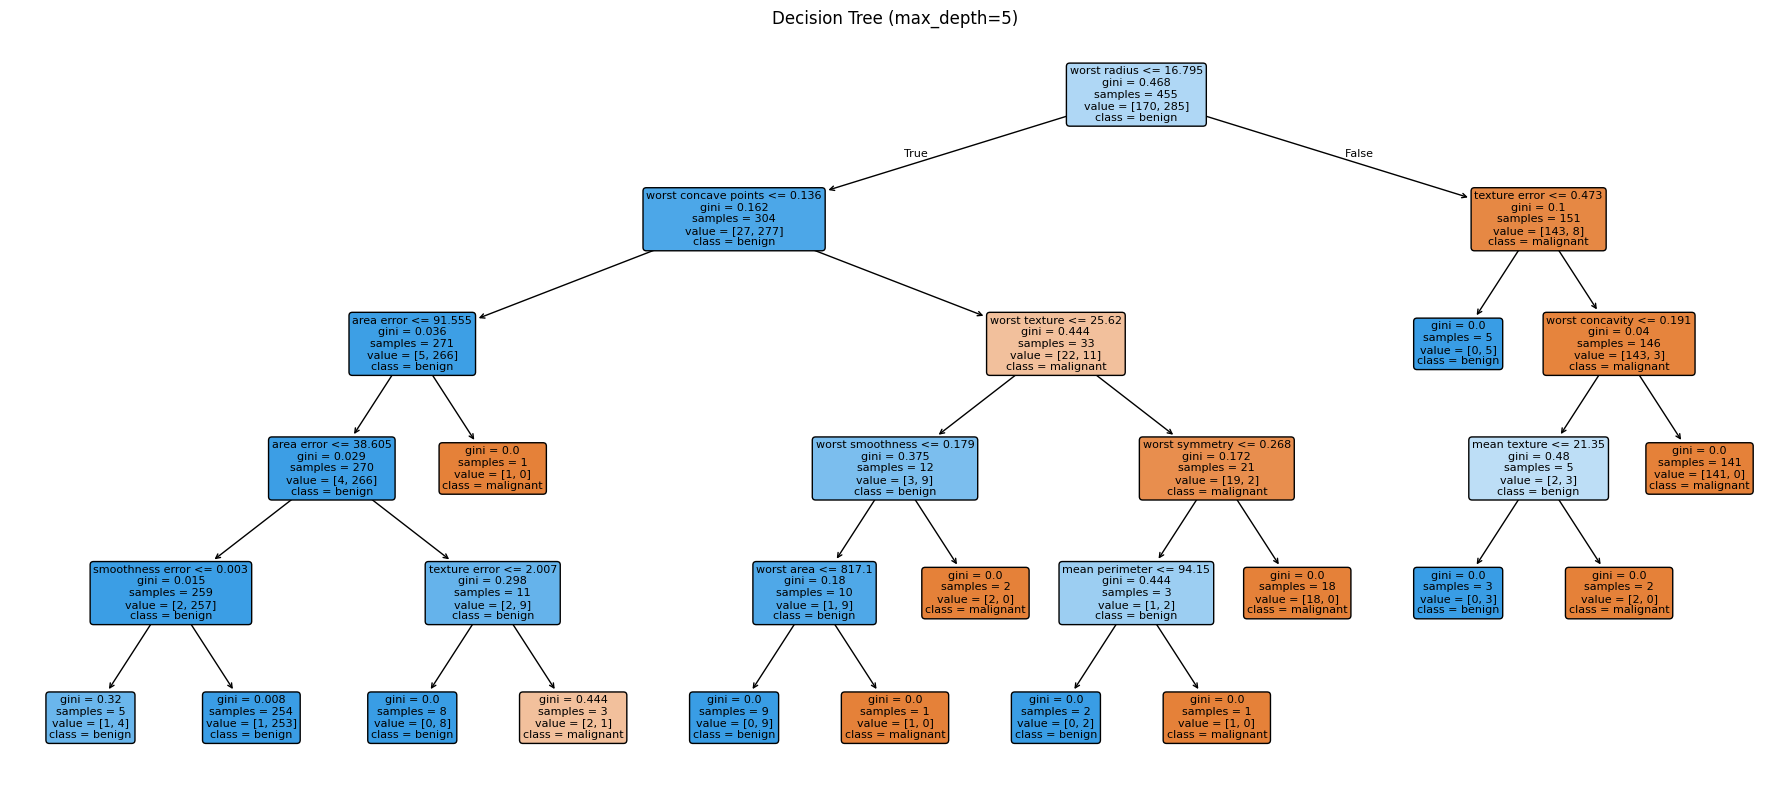

Done! Try changing max_depth, criterion, or min_samples_leaf to see the effect.


In [26]:
def plot_confusion_matrix(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(4,4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

plot_confusion_matrix(cm, class_names, title="Confusion Matrix — Decision Tree")
plt.show()

# ---- Feature Importances (Top 10)
importances = tree.feature_importances_
idx_sorted = np.argsort(importances)[::-1][:10]
plt.figure(figsize=(7,4))
plt.bar(range(len(idx_sorted)), importances[idx_sorted])
plt.xticks(range(len(idx_sorted)), feature_names[idx_sorted], rotation=45, ha='right')
plt.title("Decision Tree — Top 10 Feature Importances")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# ---- Visualize the Tree (limited depth for readability)
plt.figure(figsize=(18,8))
plot_tree(
    tree,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree (max_depth=5)")
plt.tight_layout()
plt.show()

print("Done! Try changing max_depth, criterion, or min_samples_leaf to see the effect.")